# 信號與系統實習


## 實驗開始步驟：

### (1)前往 https://github.com/htygithub/SS_EXP 點選右下角按鈕 "Download Zip"
### (2)開啟 Lesson_5_Image_Processing

## 實驗十六
### 執行以下程式碼並觀察輸出
### 影像以及濾波器

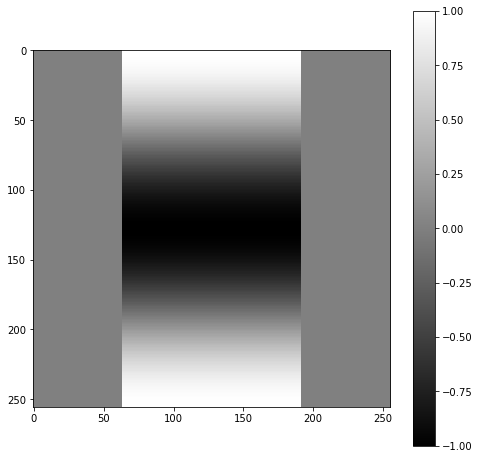

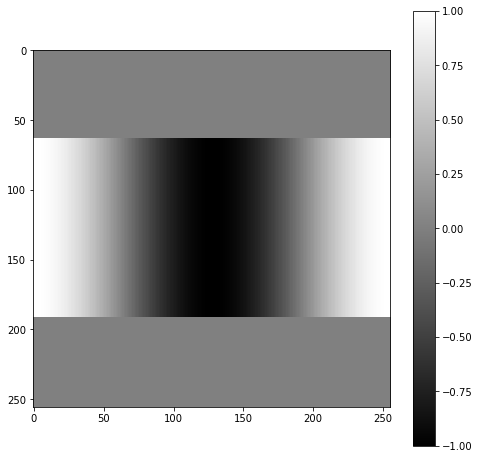

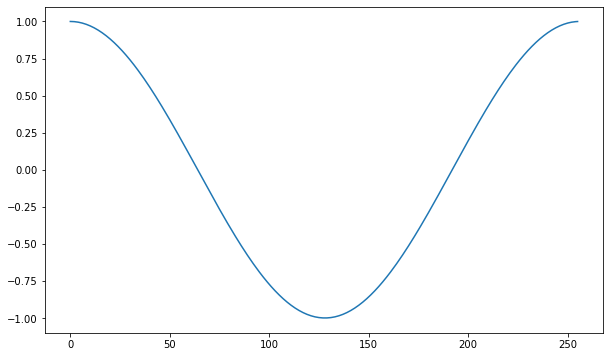

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(256)
x = np.cos(2*np.pi*n/256)
img = np.zeros((256, 256))

for ii in range(64, 192):
    img[:, ii] = x
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.colorbar()

img2 = np.zeros((256, 256))
for ii in range(64, 192):
    img2[ii, :] = x
plt.figure(figsize=(8,8))
plt.imshow(img2, cmap='gray')
plt.colorbar()

signal = img[:, 128]
plt.figure(figsize=(10,6))
plt.plot(signal)

## 問題十六
### (1) 請製作一個256x256的黑白影像，影像背景為零。圖中，有一個"甜甜圈"，圓心位於(128, 128)，內圈是半徑為60 個像素的圓，外圈為80個像素的圓
### (2)參考實驗14，設計一個FIR濾波器 bk = [1/4, -2/4, 1/4]。將影像的每一列視為一維信號並將以濾波，得到新的影像。並繪製出來
### (3)同上題，改將每一"行"視為一維信號並將以濾波，得到新的影像。並繪製出來
### (4) 上網查詢現成之 convolve指令, 用以下之2D kernel來過濾甜甜圈影像，並觀察結果
```
from scipy.ndimage.filters import convolve
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
```

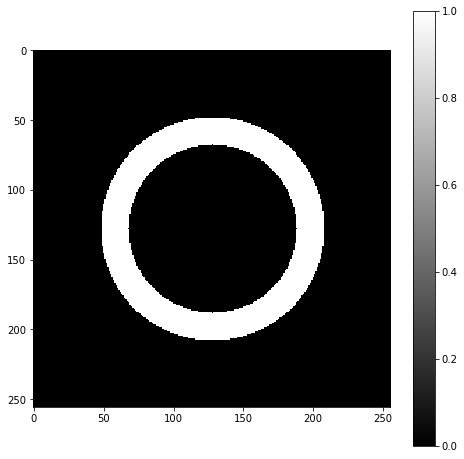

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


img = np.zeros((256, 256))

for ii in range(0,255):
    for iii in range(0,255):
        if (((((ii-128)**2 + (iii-128)**2)**0.5) > 60) and (((ii-128)**2 + (iii-128)**2)**0.5) < 80):
            #print(ii,iii)
            img[ii, iii] = 1
    
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.colorbar()

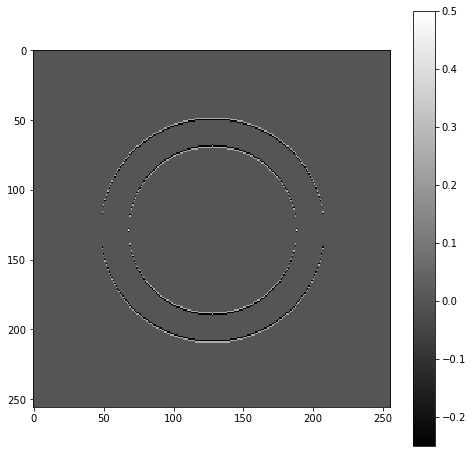

In [44]:
from scipy import signal

y = np.zeros((256,256))
for i in range(256):
    x = img[:,i]
    y[:,i] = signal.lfilter([1/4, -2/4, 1/4], 1, x)
    
plt.figure(figsize=(8,8))
plt.imshow(y, cmap='gray')
plt.colorbar()

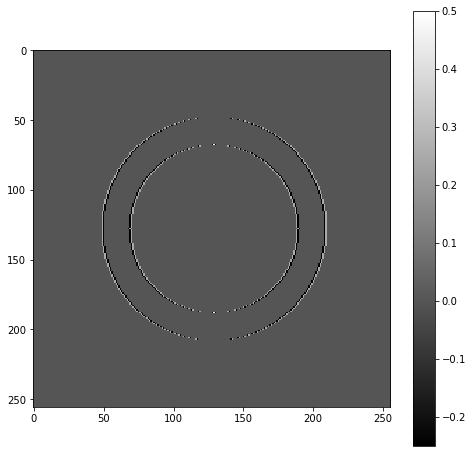

In [46]:
from scipy import signal

y = np.zeros((256,256))
for i in range(256):
    x = img[i,:]
    y[i,:] = signal.lfilter([1/4, -2/4, 1/4], 1, x)
    
plt.figure(figsize=(8,8))
plt.imshow(y, cmap='gray')
plt.colorbar()

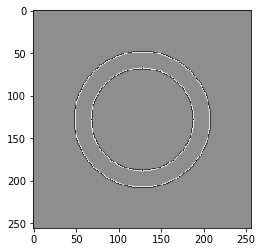

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
img_cv=convolve(img, kernel)
plt.imshow(img_cv, cmap='gray')


## 問題十七
### 執行以下程式碼並觀察輸出
### 影像開啟

uint8 (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

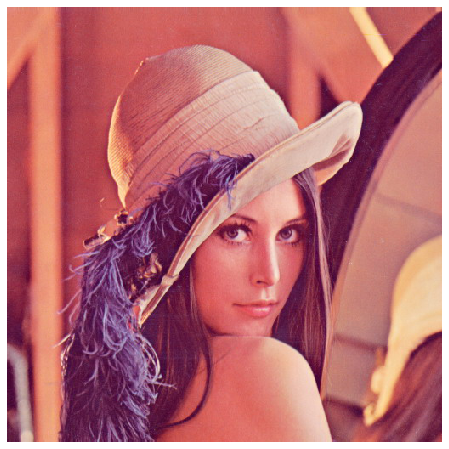

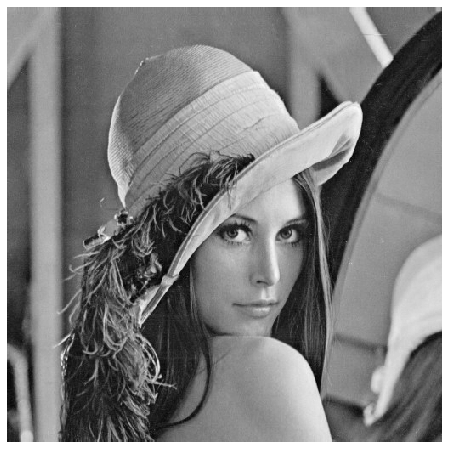

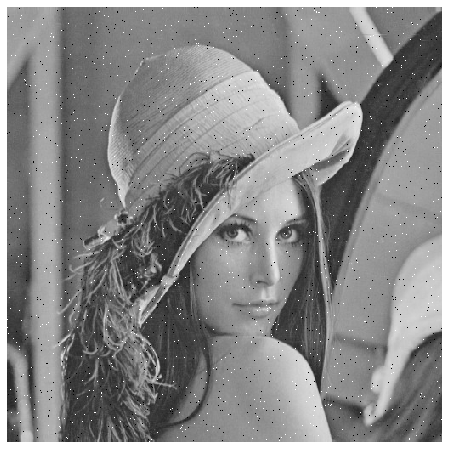

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
lena_img = plt.imread('lena_std.jpg')
lena_gray = np.mean(lena_img, axis=-1)
print(lena_img.dtype, lena_img.shape)
plt.figure(figsize=(8,8))
plt.imshow(lena_img)
plt.axis('off')

plt.figure(figsize=(8,8))
plt.imshow(lena_gray, cmap='gray')
plt.axis('off')

lena_noise = lena_gray.copy()
lena_noise[np.random.random(lena_noise.shape) > 0.995] = 0
lena_noise[np.random.random(lena_noise.shape) > 0.995] = 255
plt.figure(figsize=(8,8))
plt.imshow(lena_noise, cmap='gray')
plt.axis('off')

## 問題十七
### (1) 參考問題十六，設計一9點平均kernel來對lena_noise濾波
### (2) 上網搜尋medfilt使用方法，對lena_noise濾波並觀察結果，嘗試理解median filter之原理

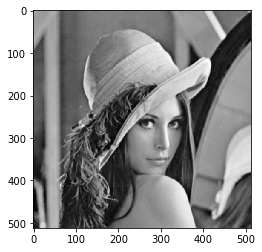

In [61]:

lena_noise = lena_gray.copy()
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
img_cv=convolve(lena_noise, kernel)
plt.imshow(img_cv, cmap='gray')


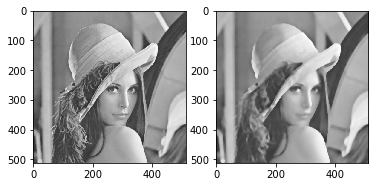

In [72]:
import scipy

lena_noise = lena_gray.copy()
plt.subplot(121)
y = scipy.signal.medfilt(lena_noise, kernel_size=3)
plt.imshow(y, cmap='gray')

plt.subplot(122)
x = scipy.signal.medfilt(lena_noise, kernel_size=9)
plt.imshow(x, cmap='gray')